In [29]:
# Notwendige Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

## Retrieve Data

In [30]:
# Laden der Daten
train = pd.read_csv('train.csv')

## Clean & Explore

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Fehlende Werte
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

# Zuordnung kategorischer Variablen zu ganzen Zahlen
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0}).astype(int)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping).astype(int)

## Prepare & Transform

In [33]:
# Vereinfachtes Feature-Engineering
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

In [34]:
# Vorbereiten der Daten für die Modellierung
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train['Survived']

In [35]:
# Aufteilung der Daten in Trainings- und Testsätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Develop & Train Model

In [36]:
# Definieren und Anpassen des Entscheidungsbaummodells
model1 = tree.DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
model2 = RandomForestClassifier(random_state=1, n_estimators=100)  # 100 Bäume im Wald
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [38]:
# XGBoost Classifier
model3 = xgb.XGBClassifier(eval_metric='logloss', random_state=1)
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

## Validate & Evaluate Model

In [39]:
# Vorhersagen für den Testsatz treffen
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

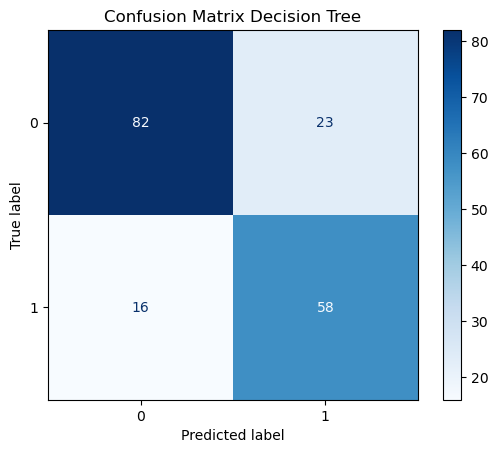

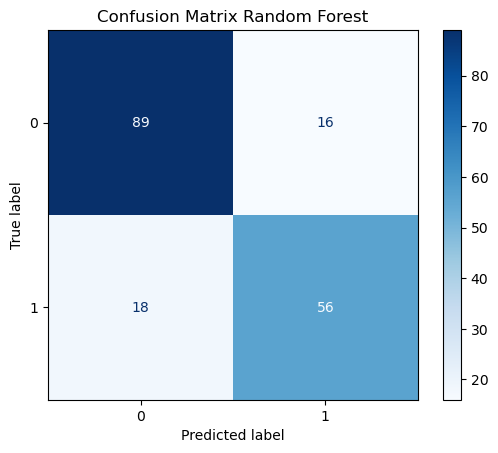

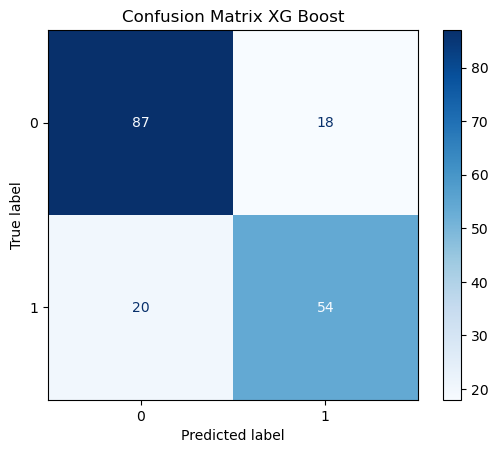

In [40]:
# Konfusionsmatrix für erstes Modell
conf_matrix = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Decision Tree')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix XG Boost')
plt.show()

In [41]:
# Berechnen der Metriken für jede Klasse und zusammengefasst
report1 = classification_report(y_test, y_pred1, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print("Klassifikationsbericht Entscheidungsbaum")
print(report1)

# Berechnen der Metriken für jede Klasse und zusammengefasst
report2 = classification_report(y_test, y_pred2, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print("Klassifikationsbericht Random Forest")
print(report2)

# Berechnen der Metriken für jede Klasse und zusammengefasst
report3 = classification_report(y_test, y_pred3, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print("Klassifikationsbericht XG Boost")
print(report3)

Klassifikationsbericht Entscheidungsbaum
              precision    recall  f1-score   support

   Gestorben       0.84      0.78      0.81       105
    Überlebt       0.72      0.78      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Klassifikationsbericht Random Forest
              precision    recall  f1-score   support

   Gestorben       0.83      0.85      0.84       105
    Überlebt       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Klassifikationsbericht XG Boost
              precision    recall  f1-score   support

   Gestorben       0.81      0.83      0.82       105
    Überlebt       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg      

### Tuning Entscheidungsbaum

In [42]:
# Parameterbereich für GridSearch
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'random_state': [1]  # Setzen des Seeds für den Decision Tree
}

In [43]:
# Erstellen des Klassifikators fürs Tuning
model = tree.DecisionTreeClassifier()

In [44]:
# Erstellen des GridSearchCV-Objekts
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', verbose=1)  

In [45]:
# Modelltuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'random_state': [1]},
             scoring='f1', verbose=1)

In [46]:
# Beste Parameter und beste Schätzung ausgeben
print("Beste Parameter:", grid_search.best_params_)
print("Bestes Modell:", grid_search.best_estimator_)

Beste Parameter: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 1}
Bestes Modell: DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)


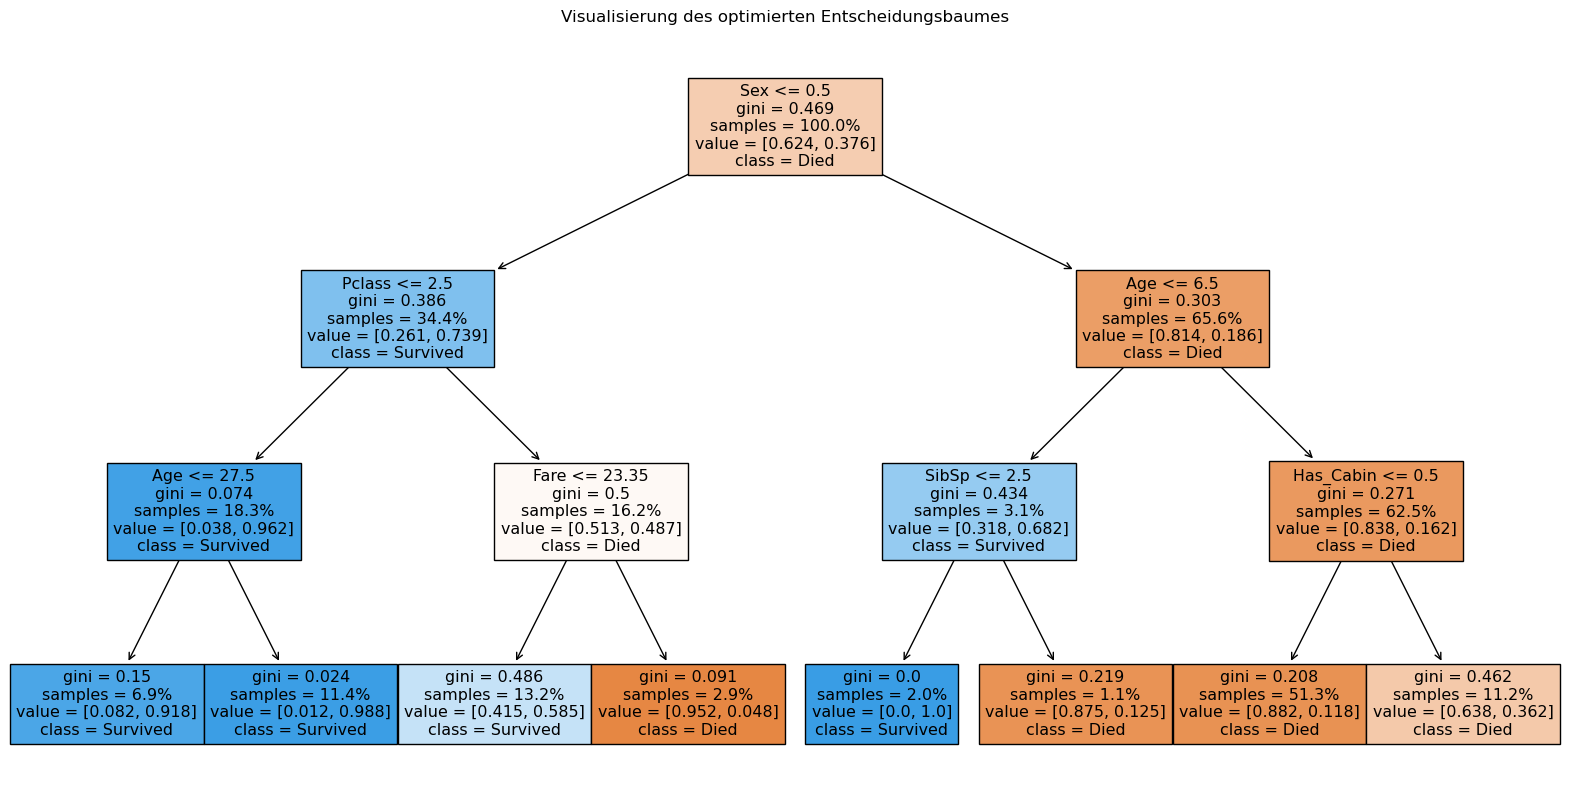

In [47]:
# Visualisieren des Entscheidungsbaumes
plt.figure(figsize=(20, 10))
tree.plot_tree(grid_search.best_estimator_, filled=True, feature_names=X_train.columns.tolist(), class_names=['Died', 'Survived'], proportion=True)
plt.title('Visualisierung des optimierten Entscheidungsbaumes')
plt.show()

In [48]:
# Vorhersagen mit dem besten Modell
y_pred_best = grid_search.best_estimator_.predict(X_test)

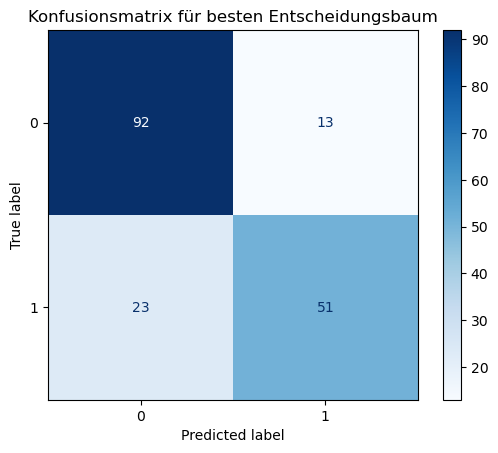

In [49]:
# Konfusionsmatrix für bestes Modell
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Konfusionsmatrix für besten Entscheidungsbaum')
plt.show()

In [50]:
# Ausführlicher Bericht für bestes Modell
report = classification_report(y_test, y_pred_best, target_names=['Died', 'Survived'])
print("Klassifikationsbericht für besten Entscheidungsbaum:\n", report)

Klassifikationsbericht für besten Entscheidungsbaum:
               precision    recall  f1-score   support

        Died       0.80      0.88      0.84       105
    Survived       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Tuning Random Forest

In [51]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [1]
}

# Erstellen und Trainieren des GridSearchCV-Objekts
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Ausgeben der besten Hyperparameter und des besten Modells
print("Beste Hyperarameter für Random Forest:", grid_search_rf.best_params_)
print("Bestes Random Forest Modell:", grid_search_rf.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Beste Hyperarameter für Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 1}
Bestes Random Forest Modell: RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=1)


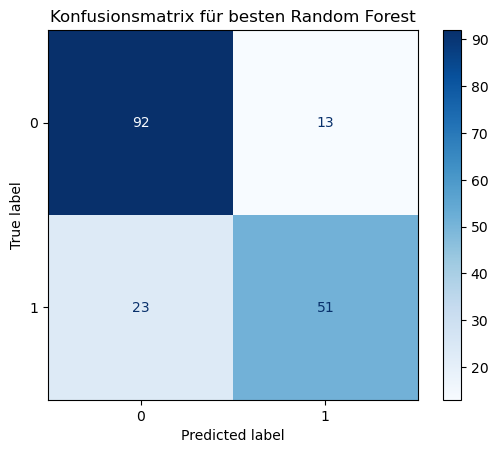

Klassifikationsbericht für besten Random Forest:
               precision    recall  f1-score   support

        Died       0.80      0.88      0.84       105
    Survived       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [52]:
# Vorhersagen mit dem besten Modell
y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_test)

# Konfusionsmatrix für bestes Modell
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Konfusionsmatrix für besten Random Forest')
plt.show()

# Ausführlicher Bericht für bestes Modell
report = classification_report(y_test, y_pred_best_rf, target_names=['Died', 'Survived'])
print("Klassifikationsbericht für besten Random Forest:\n", report)

### Tuning XG Boost

In [53]:
# Definieren Sie das Parameterraster für GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Erstellen und Trainieren des GridSearchCV-Objekts
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Ausgeben der besten Hyperparameter und des besten Modells
print("Beste Parameter:", grid_search.best_params_)
print("Bestes Modell:", grid_search.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Beste Parameter: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Bestes Modell: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)


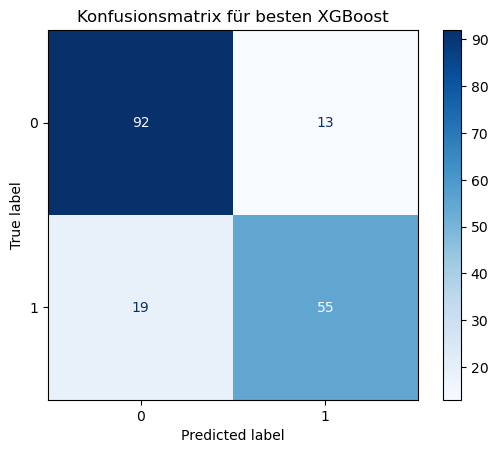

Klassifikationsbericht für besten XGBoost:
               precision    recall  f1-score   support

   Gestorben       0.83      0.88      0.85       105
    Überlebt       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [54]:
# Vorhersagen mit dem besten Modell
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

# Konfusionsmatrix für bestes Modell
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Konfusionsmatrix für besten XGBoost')
plt.show()

# Ausführlicher Bericht für bestes Modell
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Gestorben', 'Überlebt'])
print("Klassifikationsbericht für besten XGBoost:\n", report_xgb)